In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
df = pd.read_csv("long_run_varying_flows_labelled.csv")
print(df.shape)
drop_cols = ["Timestamp_IST", "State"]
df = df.drop(columns=drop_cols)


(86400, 50)


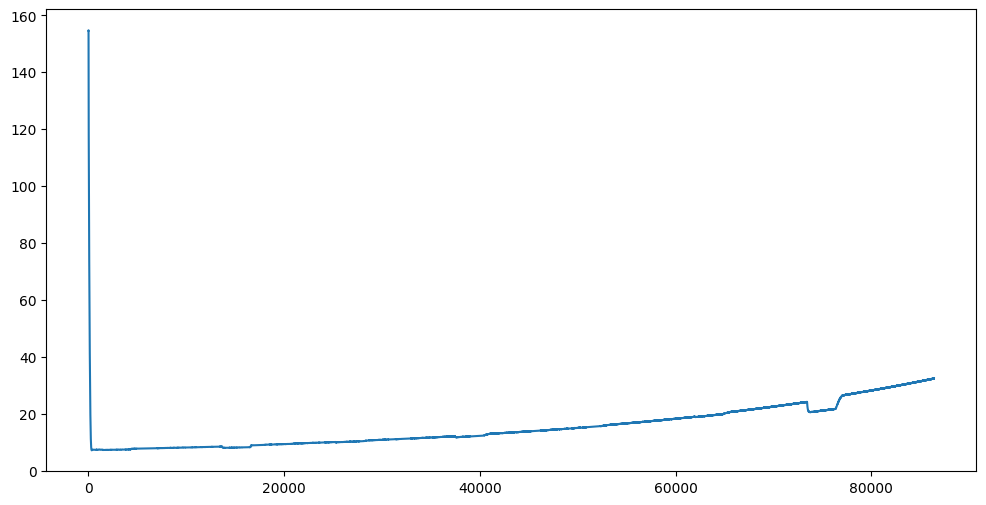

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(df['S1-PT-1001A'], label='S1-PT-1001A')

In [ ]:
# csv_1 = pd.read_csv(r"C:\Users\adith\AppData\Local\Temp\5c4a1605-e71e-4f33-8c31-d281f3c4bdb0_Emerson_app.zip.db0\GlitchDetect\PCA\varying_flows.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\adith\\AppData\\Local\\Temp\\5c4a1605-e71e-4f33-8c31-d281f3c4bdb0_Emerson_app.zip.db0\\GlitchDetect\\PCA\\varying_flows.csv'

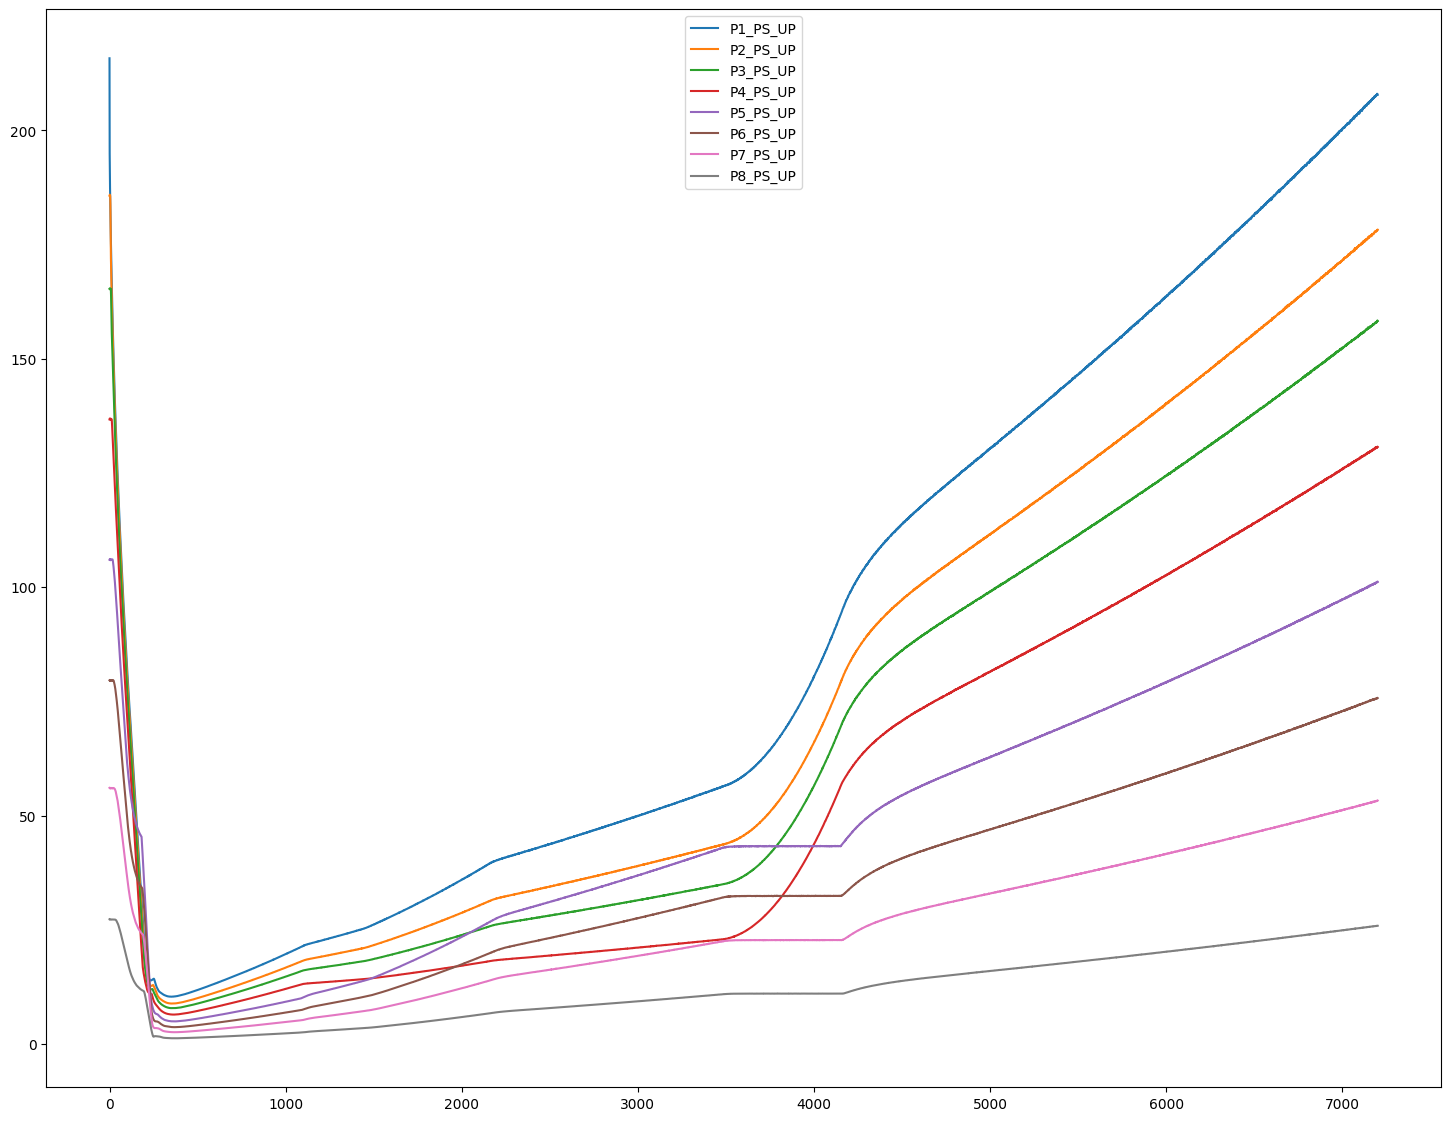

In [ ]:
plt.figure(figsize=(18, 14))
for i in range(1, 9):
    plt.plot(csv_1[f'P{i}_PS_UP'], label=f'P{i}_PS_UP')

plt.legend()
plt.show()

In [5]:
lr = pd.read_csv('F:\MultiDimensionalAD\data\long_run_labelled.csv')


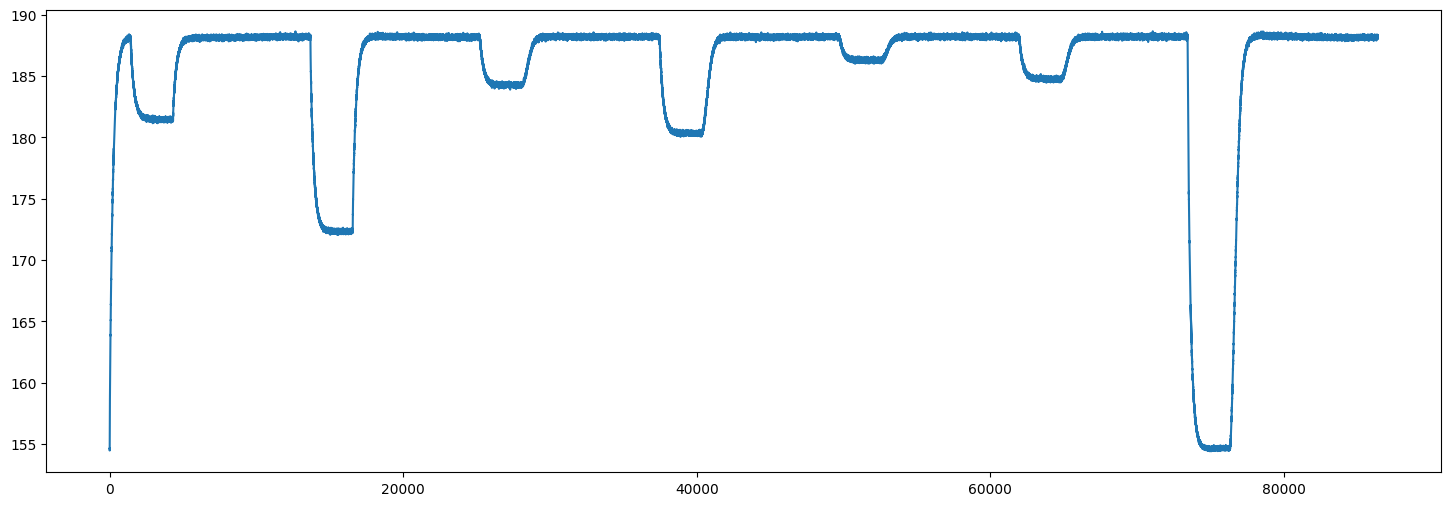

In [6]:
plt.figure(figsize=(18, 6))
plt.plot(lr['S1-PT-1001A'])

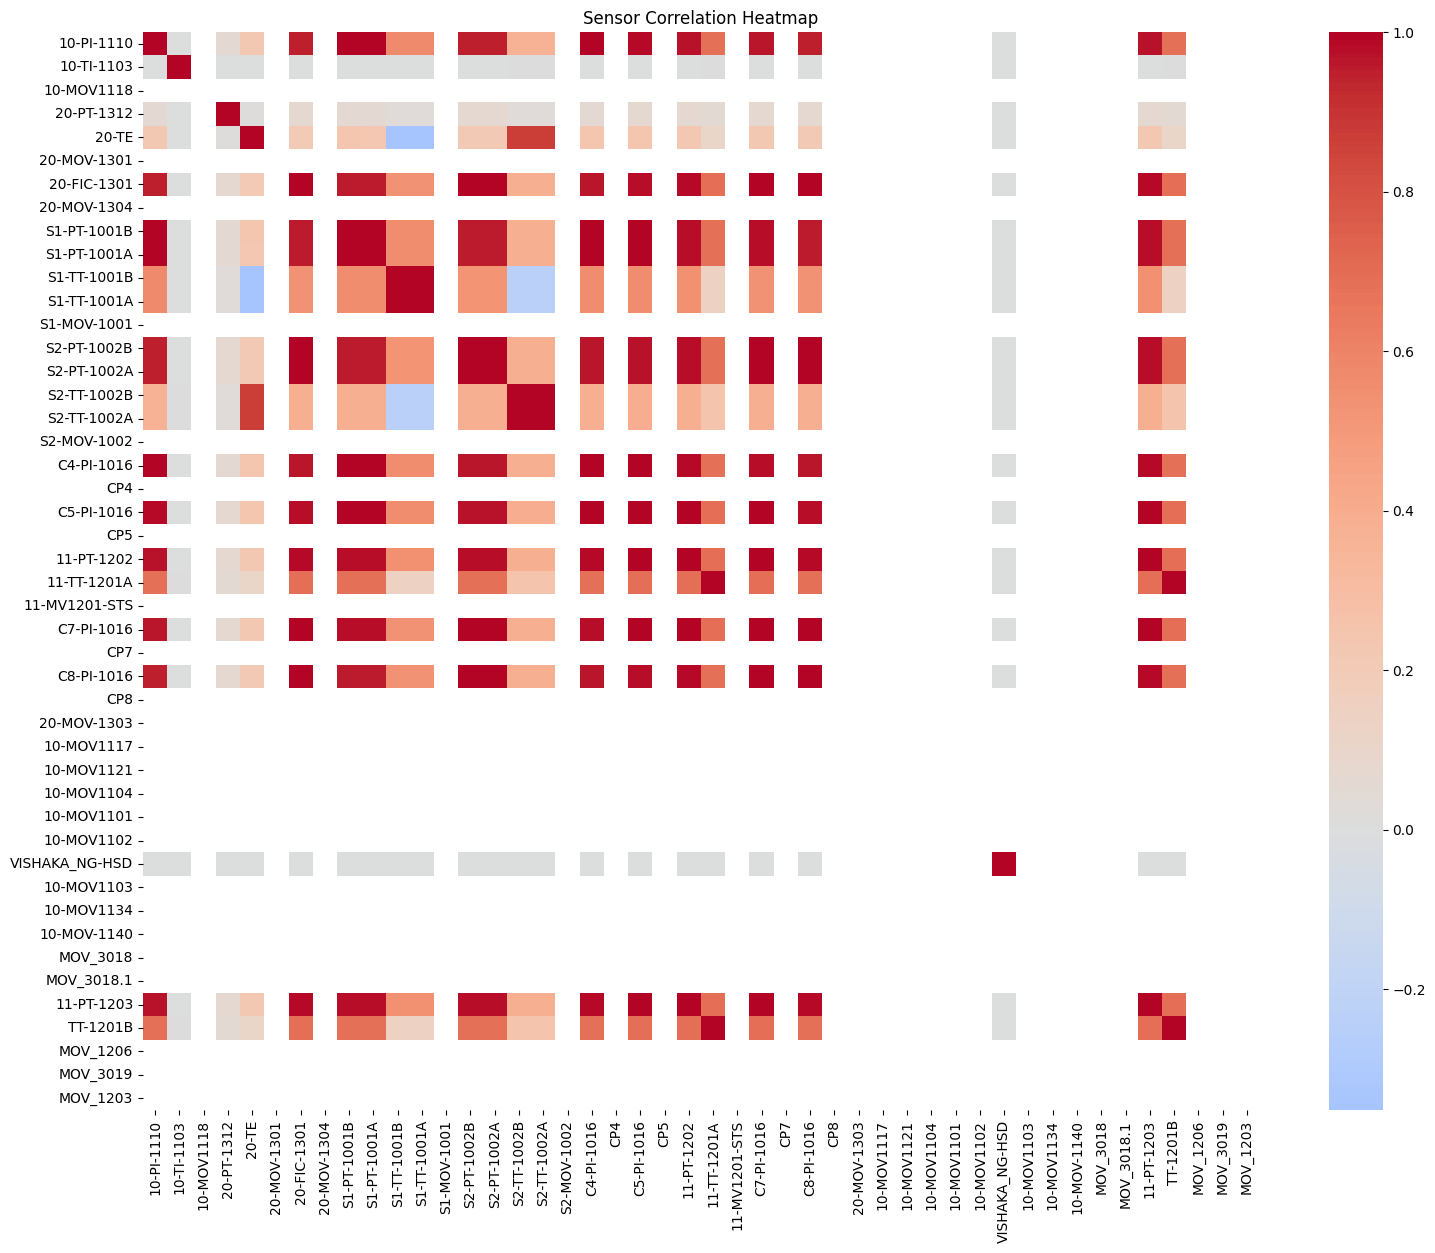

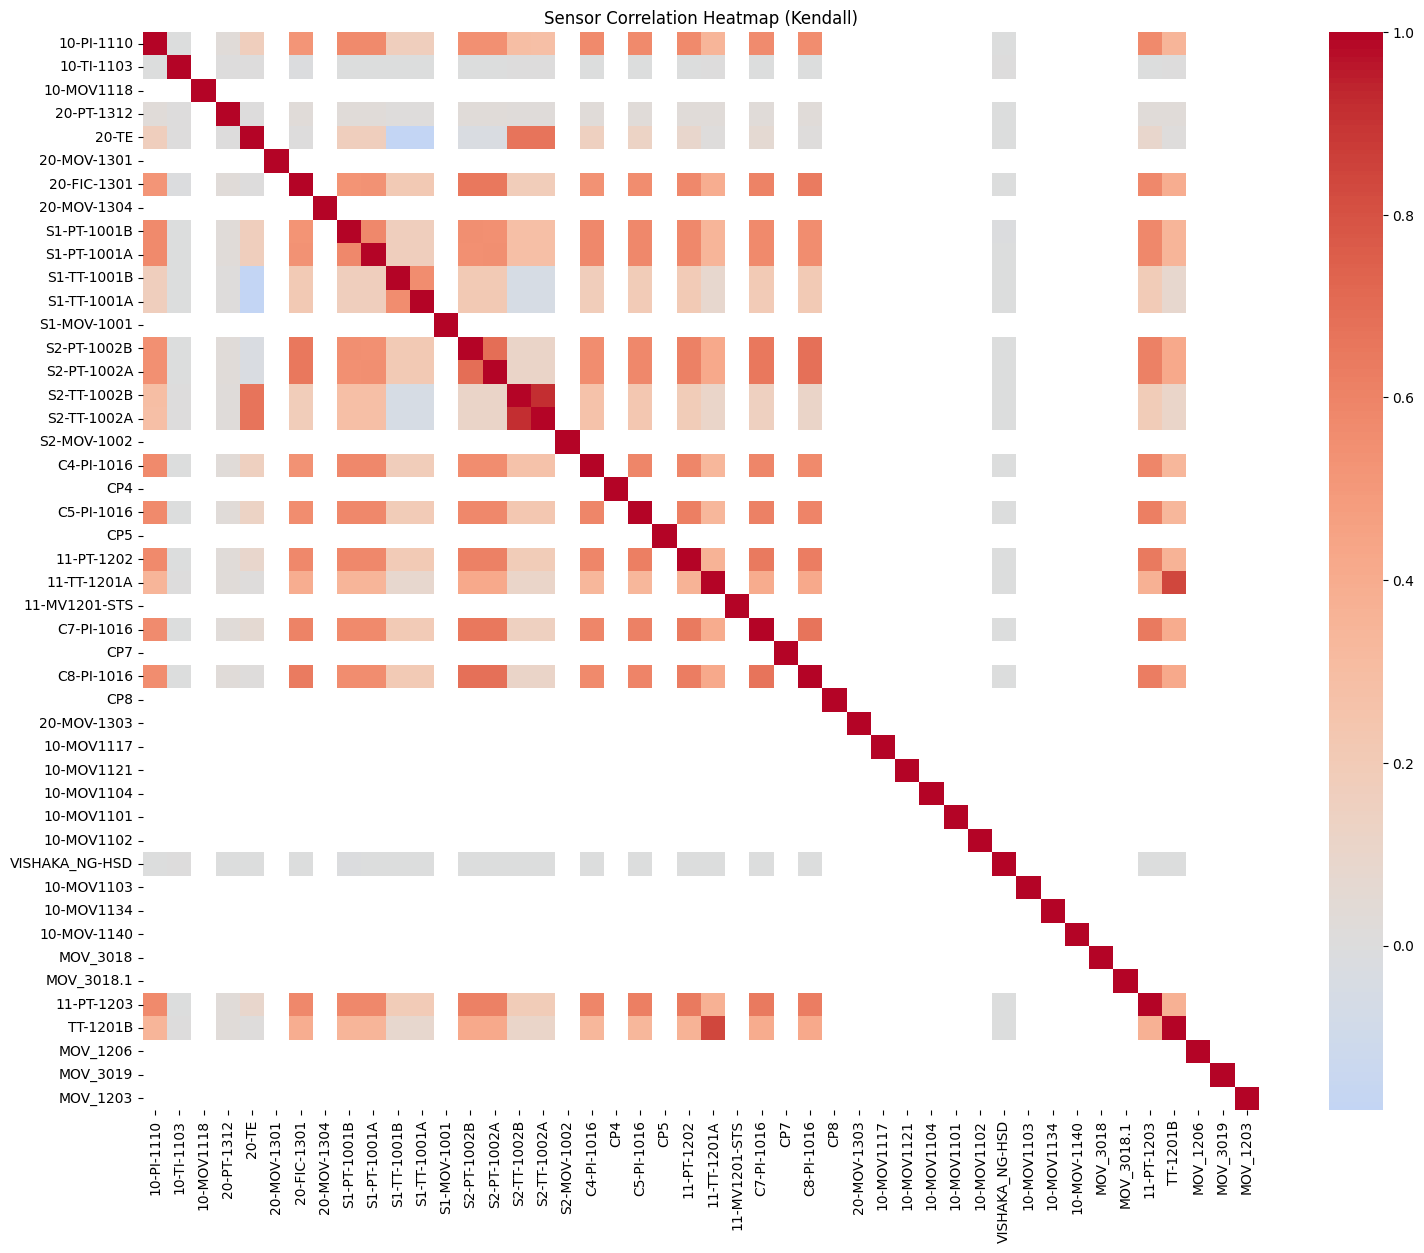

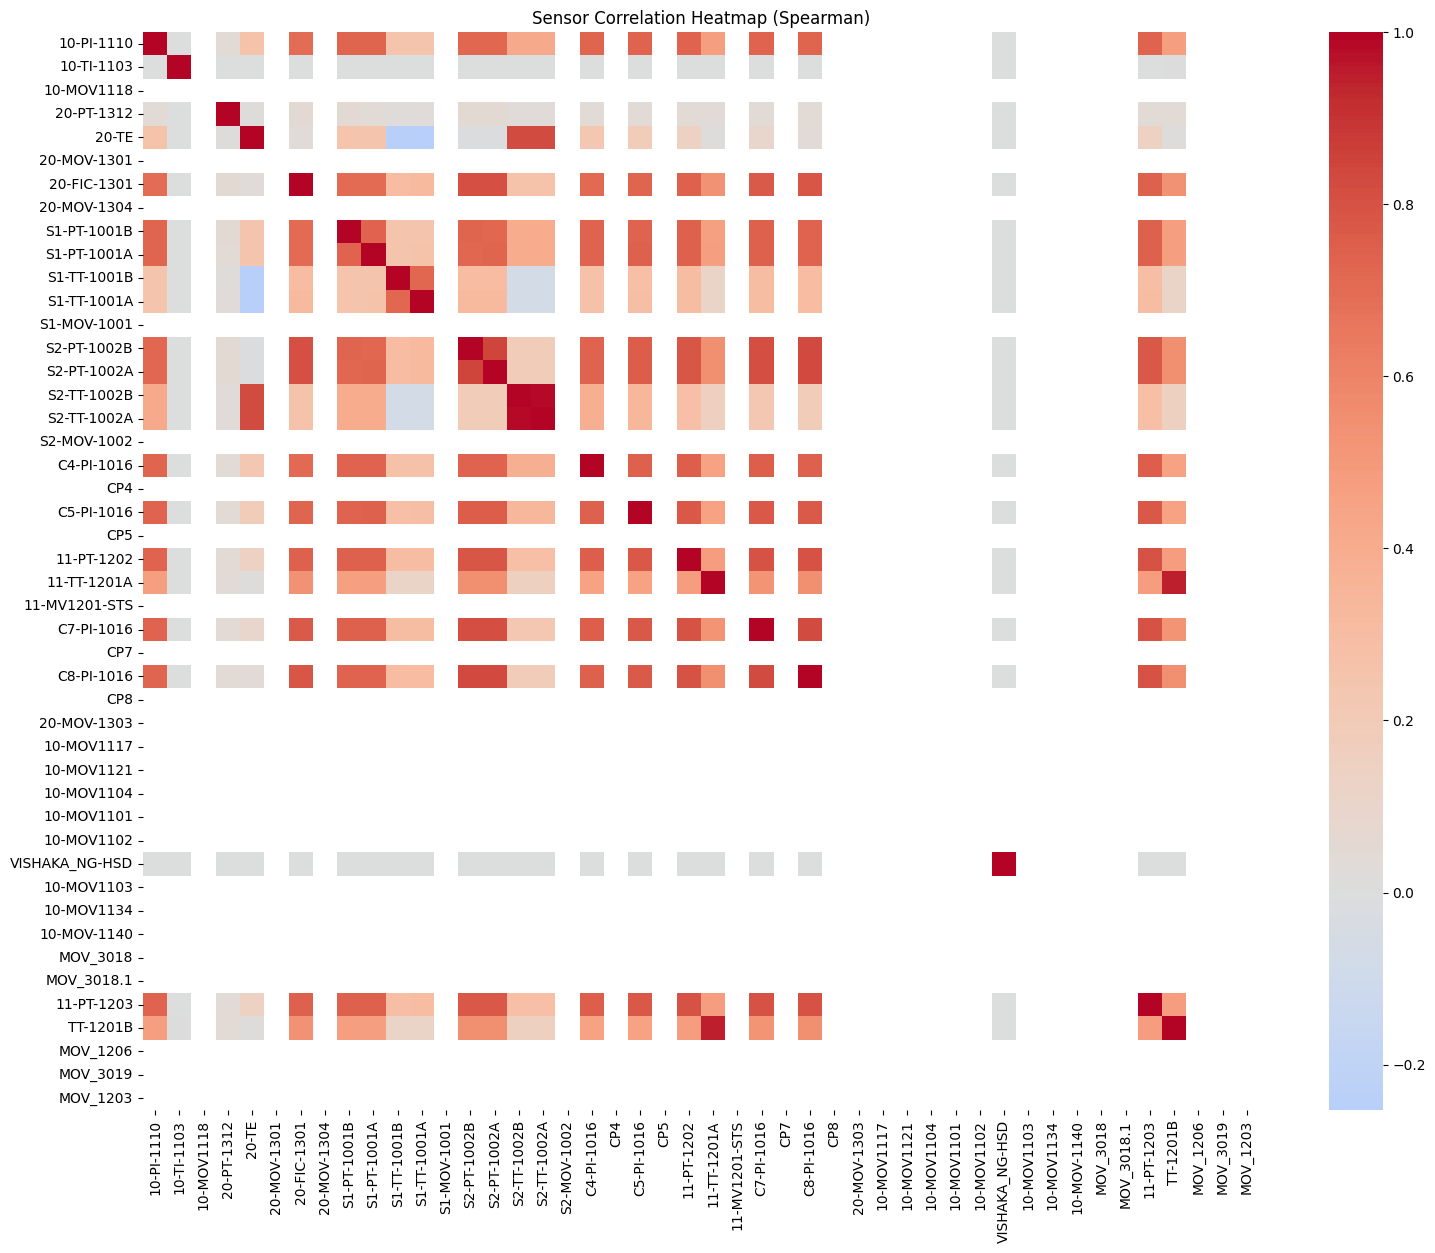

                10-PI-1110  10-TI-1103  10-MOV1118  20-PT-1312     20-TE  \
10-PI-1110        1.000000   -0.002134         NaN    0.029094  0.173009   
10-TI-1103       -0.002134    1.000000         NaN    0.000398  0.000729   
10-MOV1118             NaN         NaN         1.0         NaN       NaN   
20-PT-1312        0.029094    0.000398         NaN    1.000000  0.008596   
20-TE             0.173009    0.000729         NaN    0.008596  1.000000   
20-MOV-1301            NaN         NaN         NaN         NaN       NaN   
20-FIC-1301       0.523237   -0.005165         NaN    0.031189  0.008096   
20-MOV-1304            NaN         NaN         NaN         NaN       NaN   
S1-PT-1001B       0.573925   -0.003025         NaN    0.030676  0.167355   
S1-PT-1001A       0.574625   -0.001052         NaN    0.028977  0.167567   
S1-TT-1001B       0.167754   -0.001622         NaN    0.015463 -0.179922   
S1-TT-1001A       0.169415   -0.001459         NaN    0.017721 -0.179699   
S1-MOV-1001 

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

X = lr.drop(columns=["Timestamp_IST", "State", "label", 'Seconds'])
# remove values with NaN
X = X.dropna()

corr = X.corr(method="pearson")
corr_ken = X.corr(method="kendall")
corr_spearman = X.corr(method="spearman")

plt.figure(figsize=(18, 14))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Sensor Correlation Heatmap")
plt.show()

plt.figure(figsize=(18, 14))
sns.heatmap(corr_ken, cmap="coolwarm", center=0)
plt.title("Sensor Correlation Heatmap (Kendall)")
plt.show()

plt.figure(figsize=(18, 14))
sns.heatmap(corr_spearman, cmap="coolwarm", center=0)
plt.title("Sensor Correlation Heatmap (Spearman)")
plt.show()

print(corr_ken)


In [ ]:
le = LabelEncoder()
lr["label_encoded"] = le.fit_transform(lr["label"])

X = lr.drop(columns=["label", "label_encoded", "Timestamp_IST", "State", 'Seconds'])
y = lr["label_encoded"]

print("All classes:", le.classes_)
from sklearn.model_selection import train_test_split

All classes: ['10pct0' '2pct0' '2pct130' '2pct250' '4pct0' '4pct130' '4pct250'
 'no_fault']


In [ ]:
# apply PCA on all features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=0.95)  # retain 95% variance
X_pca = pca.fit_transform(X_scaled)


In [ ]:
print("Train classes:", le.inverse_transform(np.unique(y_train)))
print("Test classes :", le.inverse_transform(np.unique(y_test)))


Train classes: ['2pct0' '2pct130' '2pct250' '4pct0' '4pct130' '4pct250' 'no_fault']
Test classes : ['10pct0' 'no_fault']


In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [ ]:
pca = PCA(n_components=3, random_state=42)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca  = pca.transform(X_test_scaled)


In [ ]:
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Cumulative variance:", pca.explained_variance_ratio_.cumsum())


Explained variance ratio: [0.62594804 0.19965307 0.06570283]
Cumulative variance: [0.62594804 0.82560112 0.89130395]


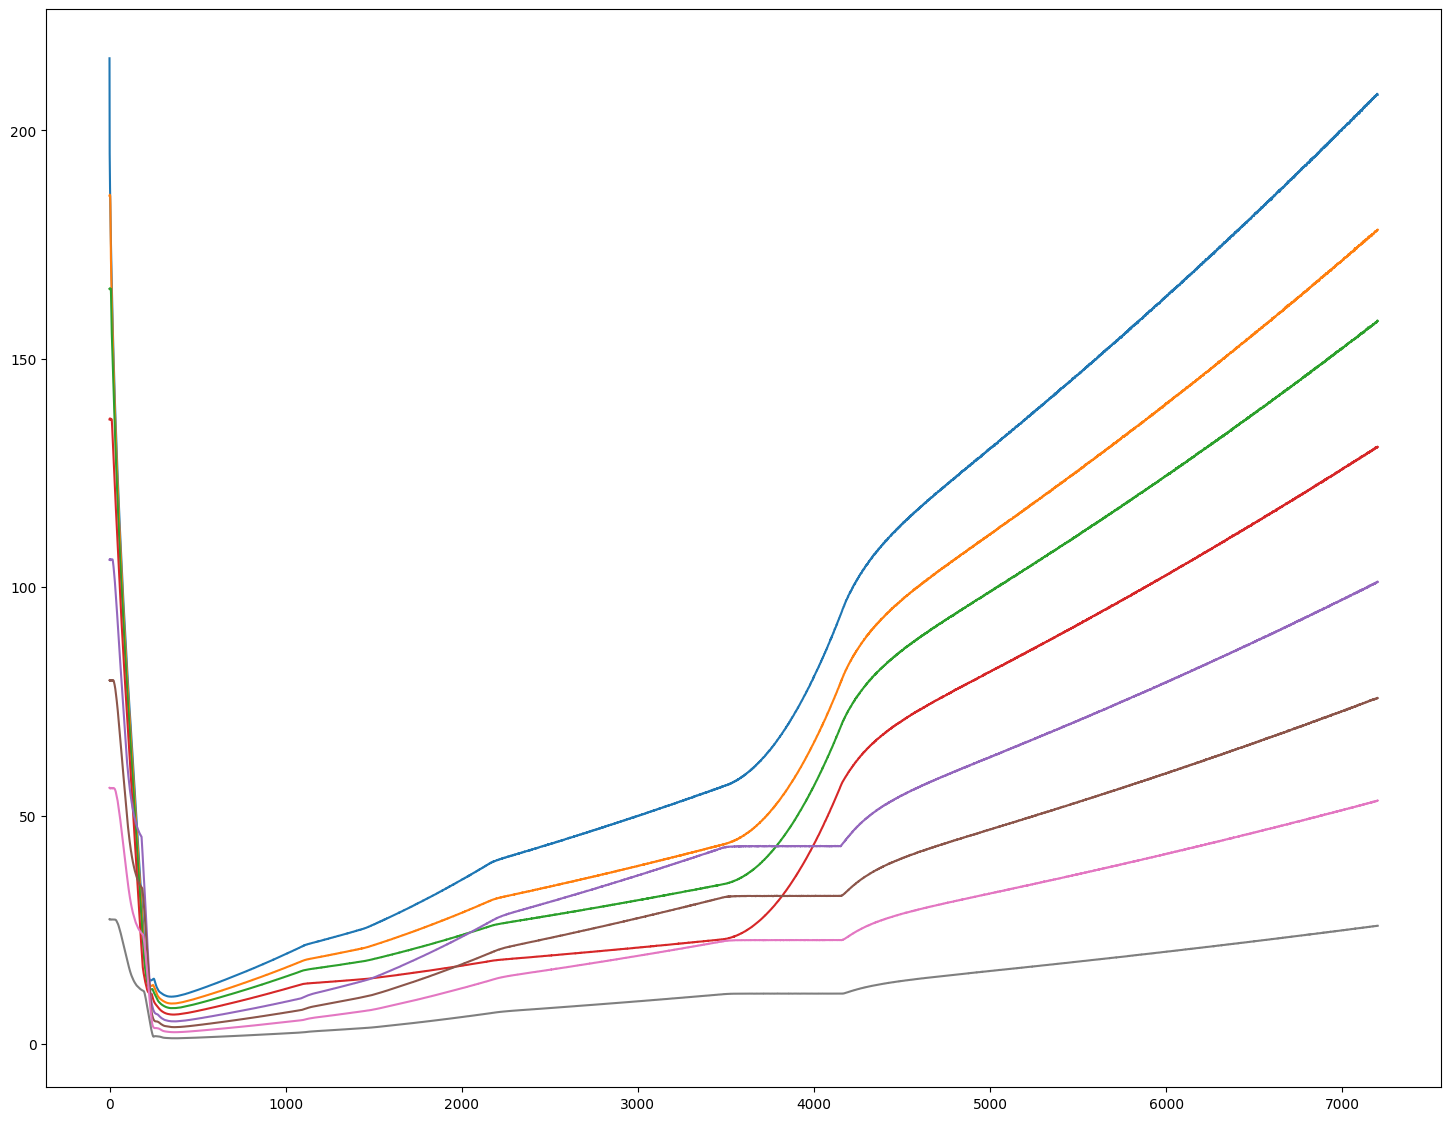

In [ ]:
plt.figure(figsize=(18, 14))

for i in range(1, 9):
    plt.plot(csv_1[f'P{i}_PS_UP'], label=f'P{i}_PS_UP')
    

Explained variance ratio: [0.6264106  0.14519896 0.06013149 0.04553257 0.04545013 0.04516109]
Cumulative variance: [0.6264106  0.77160956 0.83174106 0.87727363 0.92272376 0.96788485]


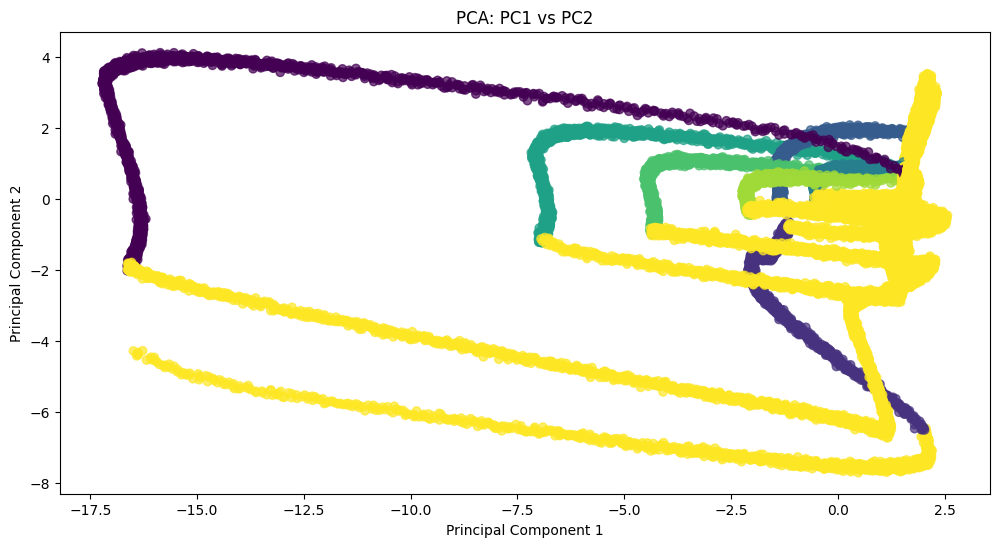

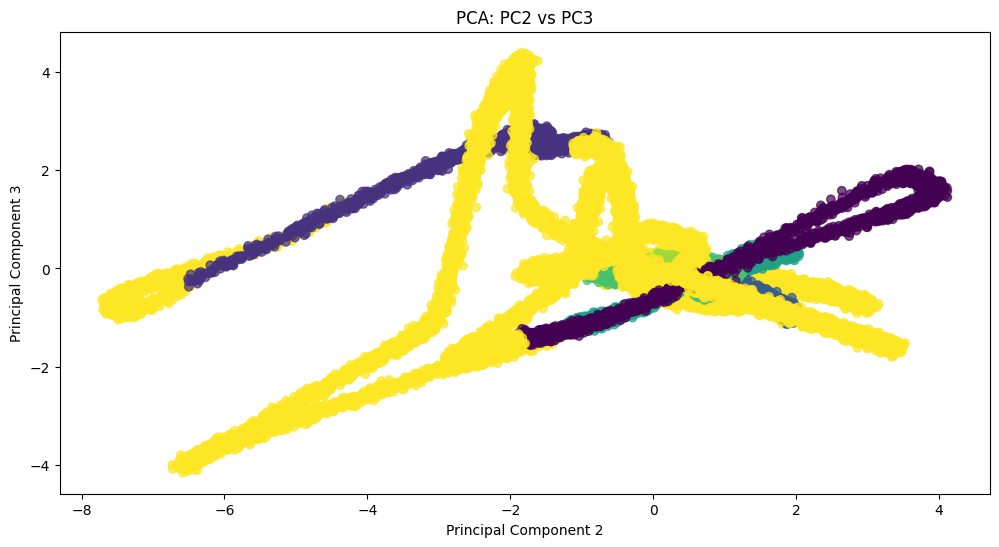

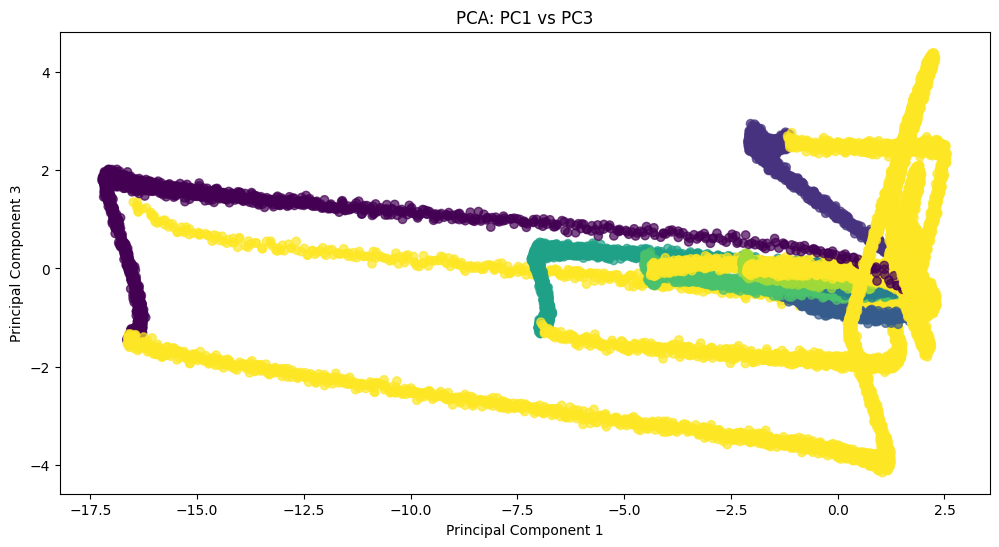

In [ ]:
# perform pca for all features and complete set
X = lr.drop(columns=["label", "label_encoded", "Timestamp_IST", "State", 'Seconds'])

X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=0.95)  # retain 95% variance
X_pca = pca.fit_transform(X_scaled)


print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Cumulative variance:", pca.explained_variance_ratio_.cumsum())

#plot pc1 vs pc2 and pc2 vs pc3 and pc1 vs pc3 with different colors for different labels
plt.figure(figsize=(12, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: PC1 vs PC2')

plt.figure(figsize=(12, 6))
plt.scatter(X_pca[:, 1], X_pca[:, 2], c=y, cmap='viridis', alpha=0.7)
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')
plt.title('PCA: PC2 vs PC3')

plt.figure(figsize=(12, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 2], c=y, cmap='viridis', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
plt.title('PCA: PC1 vs PC3')


# using plotly plot 3d scatter plot of first 3 principal components with different colors for different labels
import plotly.express as px
fig = px.scatter_3d(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    z=X_pca[:, 2],
    color=le.inverse_transform(y),
    labels={'color': 'Label'},
    title='PCA: First 3 Principal Components'
)
fig.show()